# Reproducibility Check: Compare French et al. 2012 to Current Data
- Use the same 25 F ring observations used in 2012
- Compare the EWs
- Primary differences in methodology:
  - 2012 used CISSCAL 3.6 while we now use CISSCAL 4.0
  - 2012 used radial extents from 138,465-141,835 while we now use 139,223-141,223
 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read the new data and populate the old data
obsdata = pd.read_csv('../data_files/good_qual_full.csv', parse_dates=['Date'])
olddata_dict = {
    'ISS_000RI_SATSRCHAP001_PRIME': [ 2.6, 0.8],
    'ISS_00ARI_SPKMOVPER001_PRIME': [ 3.1, 0.6],
    'ISS_006RI_LPHRLFMOV001_PRIME': [ 4.7, 0.9],
    'ISS_007RI_LPHRLFMOV001_PRIME': [ 1.5, 0.3],
    'ISS_029RF_FMOVIE001_VIMS':     [12.6, 2.7],
    'ISS_031RF_FMOVIE001_VIMS':     [10.3, 1.4],
    'ISS_032RF_FMOVIE001_VIMS':     [ 9.9, 1.8],
    'ISS_033RF_FMOVIE001_VIMS':     [12.9, 1.7],
    'ISS_036RF_FMOVIE001_VIMS':     [13.6, 5.3],
    'ISS_036RF_FMOVIE002_VIMS':     [ 2.9, 2.2],
    'ISS_039RF_FMOVIE002_VIMS':     [ 2.7, 1.7],
    'ISS_039RF_FMOVIE001_VIMS':     [ 1.7, 1.0],
    'ISS_041RF_FMOVIE002_VIMS':     [ 1.8, 1.0],
    'ISS_041RF_FMOVIE001_VIMS':     [ 2.1, 0.9],
    'ISS_044RF_FMOVIE001_VIMS':     [ 2.4, 0.9],
    'ISS_051RI_LPMRDFMOV001_PRIME': [ 8.1, 1.6],
    'ISS_055RF_FMOVIE001_VIMS':     [ 1.3, 0.3],
    'ISS_055RI_LPMRDFMOV001_PRIME': [ 3.2, 0.5],
    'ISS_057RF_FMOVIE001_VIMS':     [ 1.3, 0.3],
    'ISS_068RF_FMOVIE001_VIMS':     [ 0.9, 0.1],
    'ISS_075RF_FMOVIE002_VIMS':     [ 1.2, 0.2],
    'ISS_083RI_FMOVIE109_VIMS':     [ 1.9, 0.6],
    'ISS_087RF_FMOVIE003_PRIME':    [ 0.9, 0.2],
    'ISS_089RF_FMOVIE003_PRIME':    [ 1.0, 0.2],
    'ISS_100RF_FMOVIE003_PRIME':    [ 0.8, 0.1]
}
olddata_obsname = olddata_dict.keys() 
olddata_ew = [x[0] for x in olddata_dict.values()]
olddata_std = [x[1] for x in olddata_dict.values()]
olddata = pd.DataFrame({'EW':          olddata_ew, 
                        'EW Std':      olddata_std},
                       index=olddata_obsname)
# Find the intersection of the old and new data
# This should be the same number of observations as the old data
commondata = obsdata.join(olddata, on='Observation', how='inner', rsuffix='_old')
commondata['EW Ratio'] = commondata['EW']/commondata['EW_old']
print('Total number of new observation names:', len(obsdata))
print('Total number of observation names from 2012:', len(olddata))
print('Number of observation names in common:', len(commondata))

Total number of new observation names: 152
Total number of observation names from 2012: 25
Number of observation names in common: 25


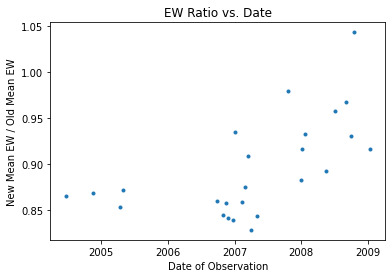

In [4]:
plt.plot(commondata['Date'], commondata['EW Ratio'], '.')
plt.xlabel('Date of Observation')
plt.ylabel('New Mean EW / Old Mean EW')
_=plt.title('EW Ratio vs. Date')

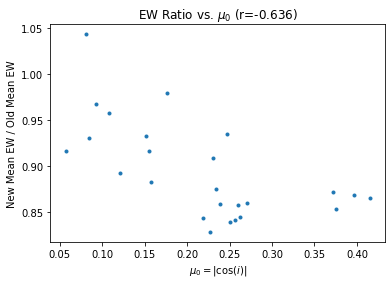

In [5]:
plt.plot(np.cos(np.radians(commondata['Incidence'])), commondata['EW Ratio'], '.')
plt.xlabel('$\mu_0=|\cos(i)|$')
plt.ylabel('New Mean EW / Old Mean EW')
_=plt.title('EW Ratio vs. $\mu_0$ (r={:.3f})'.format(np.corrcoef(np.cos(np.radians(commondata['Incidence'])), commondata['EW Ratio'])[0,1]))

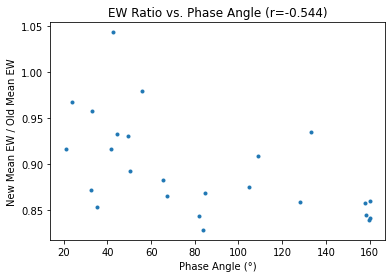

In [6]:
plt.plot(commondata['Mean Phase'], commondata['EW Ratio'], '.')
plt.xlabel('Phase Angle (°)')
plt.ylabel('New Mean EW / Old Mean EW')
_=plt.title('EW Ratio vs. Phase Angle (r={:.3f})'.format(np.corrcoef(commondata['Mean Phase'], commondata['EW Ratio'])[0,1]))

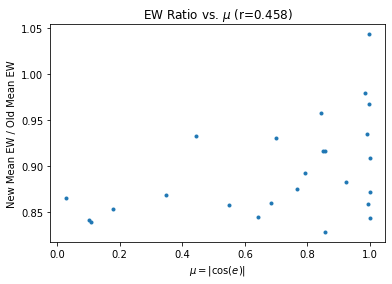

In [7]:
plt.plot(np.abs(np.cos(commondata['Mean Emission'])), commondata['EW Ratio'], '.')
plt.xlabel('$\mu=|\cos(e)|$')
plt.ylabel('New Mean EW / Old Mean EW')
_=plt.title('EW Ratio vs. $\mu$ (r={:.3f})'.format(np.corrcoef(np.abs(np.cos(commondata['Mean Emission'])), commondata['EW Ratio'])[0,1]))

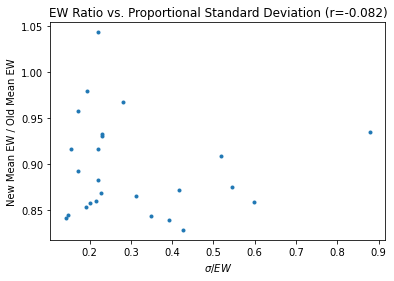

In [8]:
plt.plot(commondata['EW Std']/commondata['EW'], commondata['EW Ratio'], '.')
plt.xlabel('$\sigma/EW$')
plt.ylabel('New Mean EW / Old Mean EW')
_=plt.title('EW Ratio vs. Proportional Standard Deviation (r={:.3f})'.format(np.corrcoef(commondata['EW Std']/commondata['EW'], commondata['EW Ratio'])[0,1]))

In [9]:
# These are the images used to compare calibrations. Each is either the first or last
# image used in the 2012 paper for each observation name. The given ratio is the median 
# of the ratios of all non-zero pixel values.
# image_versions = (
#     ('N1466448701_1_CALIB-3.6.IMG', 'N1466448701_1_CALIB-4.0.IMG'),
#     ('N1479201492_1_CALIB-3.6.IMG', 'N1479201492_1_CALIB-4.0.IMG'),
#     ('N1492052646_1_CALIB-3.6.IMG', 'N1492052646_1_CALIB-4.0.IMG'),
#     ('N1493613276_1_CALIB-3.6.IMG', 'N1493613276_1_CALIB-4.0.IMG'),
#     ('N1538168640_1_CALIB-3.6.IMG', 'N1538168640_1_CALIB-4.0.IMG'),
#     ('N1541012989_1_CALIB-3.6.IMG', 'N1541012989_1_CALIB-4.0.IMG'),
#     ('N1542047155_1_CALIB-3.6.IMG', 'N1542047155_1_CALIB-4.0.IMG'),
#     ('N1543166702_1_CALIB-3.6.IMG', 'N1543166702_1_CALIB-4.0.IMG'),
#     ('N1545556618_1_CALIB-3.6.IMG', 'N1545556618_1_CALIB-4.0.IMG'),
#     ('N1546748805_1_CALIB-3.6.IMG', 'N1546748805_1_CALIB-4.0.IMG'),
#     ('N1549801218_1_CALIB-3.6.IMG', 'N1549801218_1_CALIB-4.0.IMG'),
#     ('N1551253524_1_CALIB-3.6.IMG', 'N1551253524_1_CALIB-4.0.IMG'),
#     ('N1552790437_1_CALIB-3.6.IMG', 'N1552790437_1_CALIB-4.0.IMG'),
#     ('N1554026927_1_CALIB-3.6.IMG', 'N1554026927_1_CALIB-4.0.IMG'),
#     ('N1557020880_1_CALIB-3.6.IMG', 'N1557020880_1_CALIB-4.0.IMG'),
#     ('N1571435192_1_CALIB-3.6.IMG', 'N1571435192_1_CALIB-4.0.IMG'),
#     ('N1577809417_1_CALIB-3.6.IMG', 'N1577809417_1_CALIB-4.0.IMG'),
#     ('N1578386361_1_CALIB-3.6.IMG', 'N1578386361_1_CALIB-4.0.IMG'),
#     ('N1579790806_1_CALIB-3.6.IMG', 'N1579790806_1_CALIB-4.0.IMG'),
#     ('N1589589182_1_CALIB-3.6.IMG', 'N1589589182_1_CALIB-4.0.IMG'),
#     ('N1593913221_1_CALIB-3.6.IMG', 'N1593913221_1_CALIB-4.0.IMG'),
#     ('N1598806665_1_CALIB-3.6.IMG', 'N1598806665_1_CALIB-4.0.IMG'),
#     ('N1601485634_1_CALIB-3.6.IMG', 'N1601485634_1_CALIB-4.0.IMG'),
#     ('N1602717403_1_CALIB-3.6.IMG', 'N1602717403_1_CALIB-4.0.IMG'),
#     ('N1610364098_1_CALIB-3.6.IMG', 'N1610364098_1_CALIB-4.0.IMG'),
# )
cisscal_ratio_dict = { # CISSCAL 4.0 / CISSCAL 3.6 median ratio for one image
    'ISS_000RI_SATSRCHAP001_PRIME': 0.913,
    'ISS_00ARI_SPKMOVPER001_PRIME': 0.889,
    'ISS_006RI_LPHRLFMOV001_PRIME': 0.917,
    'ISS_007RI_LPHRLFMOV001_PRIME': 0.918,
    'ISS_029RF_FMOVIE001_VIMS':     1.298,
    'ISS_031RF_FMOVIE001_VIMS':     0.925,
    'ISS_032RF_FMOVIE001_VIMS':     0.925,
    'ISS_033RF_FMOVIE001_VIMS':     1.072,
    'ISS_036RF_FMOVIE001_VIMS':     1.094,
    'ISS_036RF_FMOVIE002_VIMS':     1.002,
    'ISS_039RF_FMOVIE002_VIMS':     1.076,
    'ISS_039RF_FMOVIE001_VIMS':     1.005,
    'ISS_041RF_FMOVIE002_VIMS':     0.968,
    'ISS_041RF_FMOVIE001_VIMS':     1.245,
    'ISS_044RF_FMOVIE001_VIMS':     1.014,
    'ISS_051RI_LPMRDFMOV001_PRIME': 1.098,
    'ISS_055RF_FMOVIE001_VIMS':     0.994,
    'ISS_055RI_LPMRDFMOV001_PRIME': 0.933,
    'ISS_057RF_FMOVIE001_VIMS':     1.054,
    'ISS_068RF_FMOVIE001_VIMS':     1.061,
    'ISS_075RF_FMOVIE002_VIMS':     0.982,
    'ISS_083RI_FMOVIE109_VIMS':     0.938,
    'ISS_087RF_FMOVIE003_PRIME':    0.936,
    'ISS_089RF_FMOVIE003_PRIME':    0.936,
    'ISS_100RF_FMOVIE003_PRIME':    1.000
}
cr_obsname = cisscal_ratio_dict.keys() 
cr_ratio = cisscal_ratio_dict.values()
crdata = pd.DataFrame({'CISSCAL Ratio': cr_ratio},
                       index=cr_obsname)
commondata = commondata.join(crdata, on='Observation', how='inner', rsuffix='_old')
print('Number of old observations:', len(cr_obsname))
print('Number of common observations:', len(commondata))
print('Median EW/CISSCAL Ratios:', (commondata['EW Ratio']/commondata['CISSCAL Ratio']).median())

Number of old observations: 25
Number of common observations: 25
Median EW/CISSCAL Ratios: 0.9166749999999999


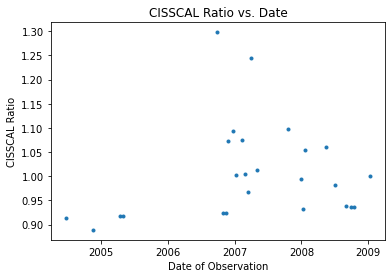

In [10]:
plt.plot(commondata['Date'], commondata['CISSCAL Ratio'], '.')
plt.xlabel('Date of Observation')
plt.ylabel('CISSCAL Ratio')
_=plt.title('CISSCAL Ratio vs. Date')

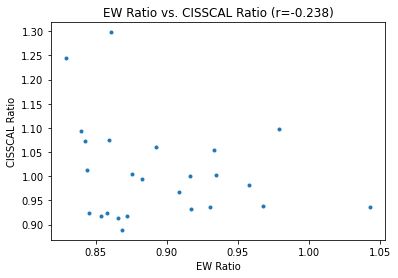

In [11]:
plt.plot(commondata['EW Ratio'], commondata['CISSCAL Ratio'], '.')
plt.xlabel('EW Ratio')
plt.ylabel('CISSCAL Ratio')
_=plt.title('EW Ratio vs. CISSCAL Ratio (r={:.3f})'.format(np.corrcoef(commondata['EW Ratio'], commondata['CISSCAL Ratio'])[0,1]))

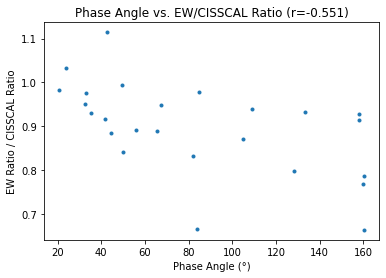

In [12]:
plt.plot(commondata['Mean Phase'], commondata['EW Ratio']/commondata['CISSCAL Ratio'], '.')
plt.xlabel('Phase Angle (°)')
plt.ylabel('EW Ratio / CISSCAL Ratio')
_=plt.title('Phase Angle vs. EW/CISSCAL Ratio (r={:.3f})'.format(np.corrcoef(commondata['Mean Phase'], commondata['EW Ratio']/commondata['CISSCAL Ratio'])[0,1]))

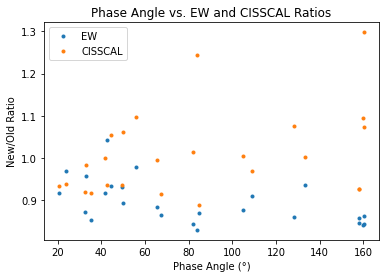

In [13]:
plt.plot(commondata['Mean Phase'], commondata['EW Ratio'], '.', label='EW')
plt.plot(commondata['Mean Phase'], commondata['CISSCAL Ratio'], '.', label='CISSCAL')
_=plt.legend()
plt.xlabel('Phase Angle (°)')
plt.ylabel('New/Old Ratio')
_=plt.title('Phase Angle vs. EW and CISSCAL Ratios')

** Statistics - ratio of phase curves including outliers
Ratio min: 0.8528828571739475
Ratio max: 0.9400953555683298
Ratio mean: 0.8871640517861863
Ratio median: 0.8825877291310791


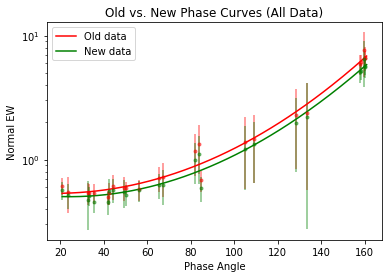

In [14]:
xrange = np.arange(commondata['Mean Phase'].min(), commondata['Mean Phase'].max()+1)
commondata['Normal EW_old'] = commondata['EW_old'] * np.abs(np.cos(np.radians(commondata['Mean Emission'])))
commondata['Normal EW Std_old'] = commondata['EW Std_old'] * np.abs(np.cos(np.radians(commondata['Mean Emission'])))
plt.errorbar(commondata['Mean Phase'], commondata['Normal EW_old'], yerr=commondata['Normal EW Std_old'], fmt='.', color='red', alpha=0.5)
plt.errorbar(commondata['Mean Phase'], commondata['Normal EW'], yerr=commondata['Normal EW Std'], fmt='.', color='green', alpha=0.5)
coeff_old = np.polyfit(commondata['Mean Phase'], np.log10(commondata['Normal EW_old']), 3)
coeff_new = np.polyfit(commondata['Mean Phase'], np.log10(commondata['Normal EW']), 3)
phase_model_old = 10**np.polyval(coeff_old, xrange)
phase_model_new = 10**np.polyval(coeff_new, xrange)
plt.plot(xrange, phase_model_old, '-', color='red', label='Old data')
plt.plot(xrange, phase_model_new, '-', color='green', label='New data')
plt.yscale('log')
plt.legend()
plt.xlabel('Phase Angle')
plt.ylabel('Normal EW')
plt.title('Old vs. New Phase Curves (All Data)')
phase_curve_ratio = phase_model_new / phase_model_old
print('** Statistics - ratio of phase curves including outliers')
print('Ratio min:', phase_curve_ratio.min())
print('Ratio max:', phase_curve_ratio.max())
print('Ratio mean:', phase_curve_ratio.mean())
print('Ratio median:', np.median(phase_curve_ratio))

In [15]:
ew_ratio = commondata['Normal EW'] / commondata['Normal EW_old']
print('** Statistics - ratio of data points including outliers')
print('Ratio min:', ew_ratio.min())
print('Ratio max:', ew_ratio.max())
print('Ratio mean:', ew_ratio.mean())
print('Ratio median:', ew_ratio.median())

** Statistics - ratio of data points including outliers
Ratio min: 0.827614723912318
Ratio max: 1.0398431579386396
Ratio mean: 0.8927074662163812
Ratio median: 0.875065767468254


In [16]:
limited_commondata = commondata[commondata['Observation'] != 'ISS_041RF_FMOVIE001_VIMS']
limited_commondata = limited_commondata[limited_commondata['Observation'] != 'ISS_044RF_FMOVIE001_VIMS']
limited_commondata = limited_commondata[limited_commondata['Observation'] != 'ISS_00ARI_SPKMOVPER001_PRIME']
print('Number of observation names after removing outliers:', len(limited_commondata))

Number of observation names after removing outliers: 22


** Statistics - ratio of phase curves excluding outliers
Ratio min: 0.8495597971819795
Ratio max: 0.9278859813683565
Ratio mean: 0.8984403133870026
Ratio median: 0.903547347795613


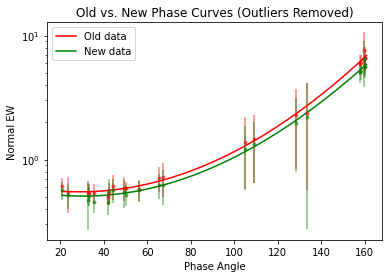

In [17]:
plt.errorbar(limited_commondata['Mean Phase'], limited_commondata['Normal EW_old'], yerr=limited_commondata['Normal EW Std_old'], fmt='.', color='red', alpha=0.5)
plt.errorbar(limited_commondata['Mean Phase'], limited_commondata['Normal EW'], yerr=limited_commondata['Normal EW Std'], fmt='.', color='green', alpha=0.5)
limited_coeff_old = np.polyfit(limited_commondata['Mean Phase'], np.log10(limited_commondata['Normal EW_old']), 3)
limited_coeff_new = np.polyfit(limited_commondata['Mean Phase'], np.log10(limited_commondata['Normal EW']), 3)
limited_phase_model_old = 10**np.polyval(limited_coeff_old, xrange)
limited_phase_model_new = 10**np.polyval(limited_coeff_new, xrange)
plt.plot(xrange, limited_phase_model_old, '-', color='red', label='Old data')
plt.plot(xrange, limited_phase_model_new, '-', color='green', label='New data')
plt.yscale('log')
plt.legend()
plt.xlabel('Phase Angle')
plt.ylabel('Normal EW')
plt.title('Old vs. New Phase Curves (Outliers Removed)')
limited_phase_curve_ratio = limited_phase_model_new / limited_phase_model_old
print('** Statistics - ratio of phase curves excluding outliers')
print('Ratio min:', limited_phase_curve_ratio.min())
print('Ratio max:', limited_phase_curve_ratio.max())
print('Ratio mean:', limited_phase_curve_ratio.mean())
print('Ratio median:', np.median(limited_phase_curve_ratio))
